In [1]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt

# Purpose

## Compare sum and bulk EGAD outputs to look for GO terms of interest

In [2]:
sum_EGAD = pd.read_csv('../../data/EAGD/EGAD_sum_pc_OPfiltered.csv')
bulk_EGAD = pd.read_csv('../../data/EAGD/EGAD_bulk_pc_OPfiltered.csv')

# Plot Sum and Bulk EGAD distribution

In [3]:
# change column names
sum_EGAD.columns = ('sum_auc','sum_avg_node_degree','sum_degree_null_auc')
bulk_EGAD.columns = ('bulk_auc','bulk_avg_node_degree','bulk_degree_null_auc')

In [4]:
#concat dfs
merged =  sum_EGAD.join(bulk_EGAD)

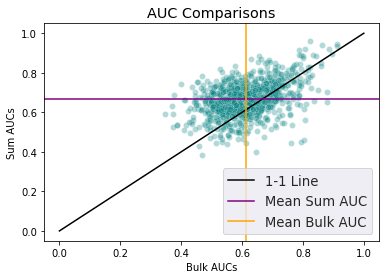

In [5]:
# Create the scatter plot with a new color
sns.scatterplot(data=merged, x='bulk_auc', y='sum_auc', alpha=0.3, color='teal')

# Add the diagonal line with a new color
sns.lineplot(x=[0, 1], y=[0, 1], color='black', linestyle='-', dashes=(5, 5), label='1-1 Line')

# Add lines for mean values with new colors
mean_bulk = merged['bulk_auc'].mean()
mean_sum = merged['sum_auc'].mean()
plt.axhline(mean_sum, color='purple', linestyle='-', label='Mean Sum AUC')
plt.axvline(mean_bulk, color='orange', linestyle='-', label='Mean Bulk AUC')

# Add title and axis labels
sns.set(font_scale=1.2)
plt.title('AUC Comparisons')
plt.xlabel('Bulk AUCs')
plt.ylabel('Sum AUCs')

# Add legend
plt.legend()


# Plot Sum and Bulk EGAD distribution

### But this time, iwant to color with a gradient by how many genes are in each GO term

In [6]:
GO = pd.read_csv('../../data/GO/pro_GO.csv')

In [7]:
# Count the number of genes in each GO. Rename the series to "count"
Genes_in_GO = GO.groupby('GO ID')['DB_Object_Symbol'].count().rename('count')

# Join the Genes_in_Go df to our "merged" dataframe which has sum and bulk egad results
merged = merged.join(Genes_in_GO)

In [8]:

merged.columns

Index(['sum_auc', 'sum_avg_node_degree', 'sum_degree_null_auc', 'bulk_auc',
       'bulk_avg_node_degree', 'bulk_degree_null_auc', 'count'],
      dtype='object')

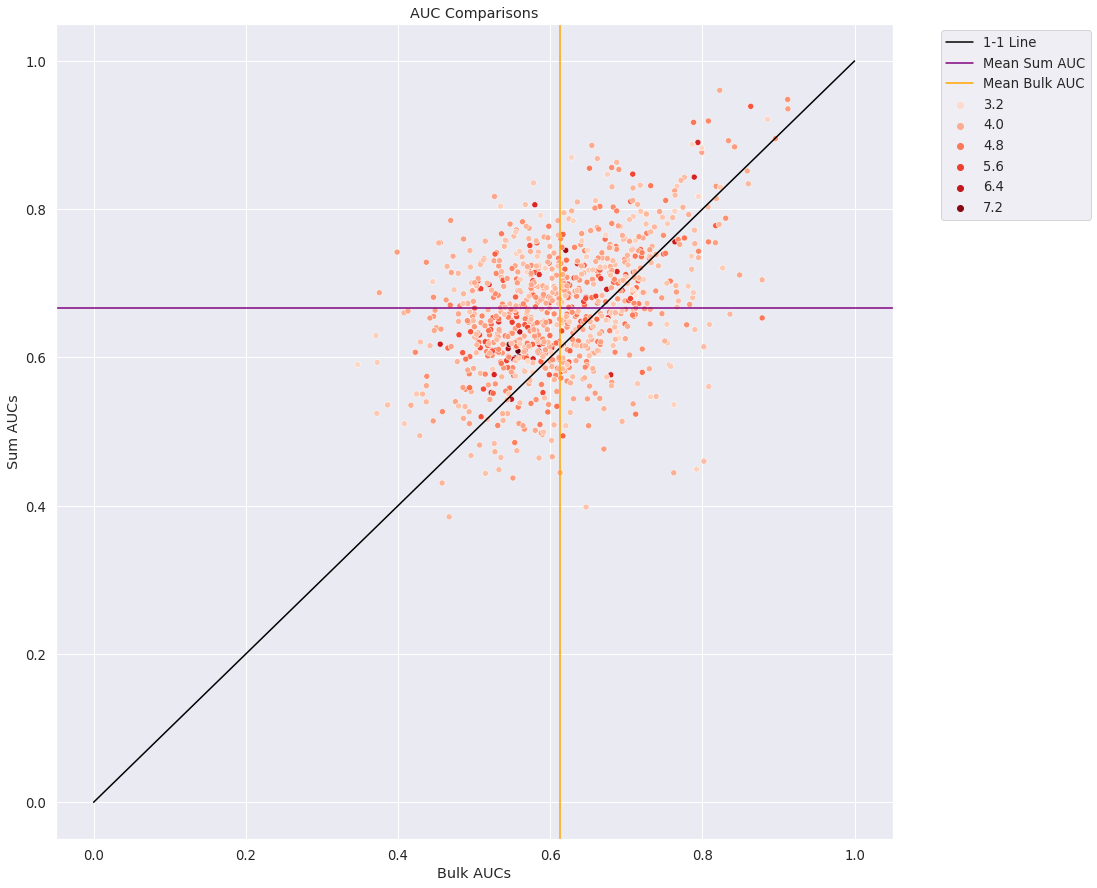

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

# Log normalize the counts
merged['log_counts'] = np.log(merged['count'])

# Remove White from the color gradient
min_val, max_val = 0.1,1.0
n = 10
orig_cmap = plt.cm.Reds
colors = orig_cmap(np.linspace(min_val, max_val, n))
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("mycmap", colors)

# Create the scatter plot with a red color gradient
plt.figure(figsize=(15, 15))
scatter_plot = sns.scatterplot(data=merged, x='bulk_auc', y='sum_auc', alpha=1, hue='log_counts', palette=cmap)

# Add the diagonal line with a new color
line_plot = sns.lineplot(x=[0, 1], y=[0, 1], color='black', linestyle='-', dashes=(5, 5), label='1-1 Line')

# Add lines for mean values with new colors
mean_bulk = merged['bulk_auc'].mean()
mean_sum = merged['sum_auc'].mean()
plt.axhline(mean_sum, color='purple', linestyle='-', label='Mean Sum AUC')
plt.axvline(mean_bulk, color='orange', linestyle='-', label='Mean Bulk AUC')

# Add title and axis labels
sns.set(font_scale=1.2)
plt.title('AUC Comparisons')
plt.xlabel('Bulk AUCs')
plt.ylabel('Sum AUCs')

# Move the legend to the right side of the graph
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


# TODO. I don;t lie this color scheme. But it kinda get the point across

# Identify GO's of interest



In [10]:

# get the two highest values from column bulk_auc
highest_bulk = merged.nlargest(500, 'bulk_auc')

# get the middle value from column B
middle_sc = merged.nsmallest(1000, 'bulk_auc').nlargest(500, 'sum_auc')

# print the results
print('Highest values in column A:')
print(highest_bulk)

print('Middle value in column B:')
print(middle_sc)



Highest values in column A:
             sum_auc  sum_avg_node_degree  sum_degree_null_auc  bulk_auc  \
GO:0042776  0.935349         10605.405194             0.929248  0.912429   
GO:0006120  0.948081         10637.540654             0.921659  0.912148   
GO:0031424  0.895229          4231.658564             0.141695  0.895973   
GO:0006956  0.921372          5564.959468             0.220891  0.885661   
GO:0031640  0.653319          4006.699228             0.196785  0.878598   
...              ...                  ...                  ...       ...   
GO:0006633  0.643540          8577.335467             0.541091  0.591766   
GO:0051028  0.693712          9803.343315             0.732382  0.591587   
GO:0050673  0.649042          7412.955797             0.421267  0.591313   
GO:0031100  0.499426          7075.552554             0.379832  0.591294   
GO:0016575  0.685262          9721.736248             0.721159  0.591253   

            bulk_avg_node_degree  bulk_degree_null_auc  cou

In [11]:
def filter_dataframe_by_bounds(df, column_name, lower_bound, upper_bound):
    """
    Filter a pandas dataframe by a column within a given range.

    Args:
        df (pandas.DataFrame): The pandas dataframe to filter.
        column_name (str): The name of the column to filter on.
        lower_bound (float): The lower bound of the range.
        upper_bound (float): The upper bound of the range.

    Returns:
        pandas.DataFrame: The filtered dataframe.
    """
    return df[(df[column_name] > lower_bound) & (df[column_name] < upper_bound)]


In [12]:
interest_HB = filter_dataframe_by_bounds(filter_dataframe_by_bounds(merged, 'bulk_auc', lower_bound=0.9, upper_bound=1), 'sum_auc', lower_bound=0.6, upper_bound=0.7)


## GO:0015889

The highest bulk point.
Has 21 Genes in it

##### GO:0034375
The one diagonal elft to GO15889


# Graphing Expression of Genes in GO:0015889

Get Genes in GO:001588

In [21]:
GO1 = GO[GO.loc[:,'GO ID'] == 'GO:0015889']

Retreive Expression of those genes

In [22]:
# load expression data 
expr_bulk = pd.read_csv('../../data/bulk/bulk_pc.csv')
expr_sum = pd.read_csv('../../data/pseudobulk/sum_pseudobulk_pc.csv')

In [23]:
# Get Expression data for the GO term in bulk and sum data
expr_GO1_bulk = expr_bulk.loc[:,expr_bulk.columns.isin(GO1.loc[:,'DB_Object_Symbol'])] # has 3 genes
expr_GO1_sum = expr_sum.loc[:,expr_sum.columns.isin(GO1.loc[:,'DB_Object_Symbol'])] # has 9 genes

bulk_GO_annot = pd.DataFrame({'gene':expr_GO1_bulk.columns,
                               'meta':'GO'})
sum_GO_annot = pd.DataFrame({'gene':expr_GO1_sum.columns,
                               'meta':'GO'})

# # Add a metadata column saying these are GO affiliated genes
# expr_GO1_bulk = expr_GO1_bulk.assign(meta="GO")
# expr_GO1_sum = expr_GO1_sum.assign(meta="GO")

# # Melt dataframes by meta column
# melt_GO1_bulk = pd.melt(expr_GO1_bulk, id_vars=['meta'], var_name='variable', value_name='value')
# melt_GO1_sum = pd.melt(expr_GO1_sum, id_vars=['meta'], var_name='variable', value_name='value')


In [24]:
# Sample 50 random expression profiles
expr_bulk_rand = expr_bulk.sample(n=50, axis=1)
expr_sum_rand = expr_sum.sample(n=50, axis = 1)

#build annot table 
bulk_rand_annot = pd.DataFrame({'gene':expr_bulk_rand.columns,
                               'meta':'rand'})
sum_rand_annot = pd.DataFrame({'gene':expr_sum_rand.columns,
                               'meta':'rand'})

# # Add a metadata column saying these are random affiliated genes
# expr_GO1_bulk = expr_GO1_bulk.assign(meta="rand")
# expr_GO1_sum = expr_GO1_sum.assign(meta="rand")


# # Melt dataframes by meta column
# melt_GO1_bulk = pd.melt(expr_GO1_bulk, id_vars=['meta'], var_name='variable', value_name='value')
# melt_GO1_sum = pd.melt(expr_GO1_sum, id_vars=['meta'], var_name='variable', value_name='value')



In [25]:
# concat dataframes
plot_GO1_bulk = pd.concat([expr_GO1_bulk, expr_bulk_rand], axis = 1)
plot_GO1_sum = pd.concat([expr_GO1_sum,expr_sum_rand], axis = 1)

# Concat annotation dfs
annot_df_bulk = pd.concat([bulk_GO_annot,bulk_rand_annot], axis = 0)
annot_df_bulk.index = annot_df_bulk.iloc[:,0]
annot_df_bulk = annot_df_bulk.iloc[:,1]

annot_df_sum = pd.concat([sum_GO_annot,sum_rand_annot], axis = 0)
annot_df_sum.index = annot_df_sum.iloc[:,0]
annot_df_sum = annot_df_sum.iloc[:,1]



In [26]:
# Prepare Categorical variable
my_palette = {'rand': 'blue',
              'GO': 'red'}

# row colors is a series where index is gene, and value is the color that that gene needs to be 
row_colors_bulk= annot_df_bulk.map(my_palette)
row_colors_sum= annot_df_sum.map(my_palette)

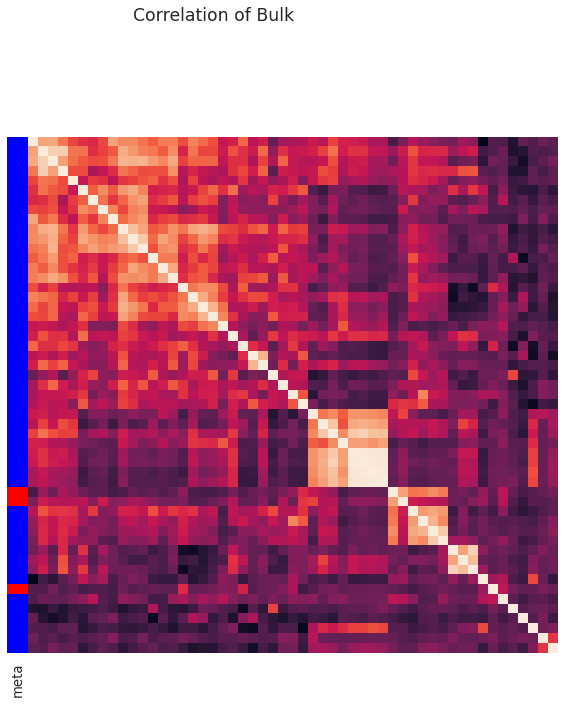

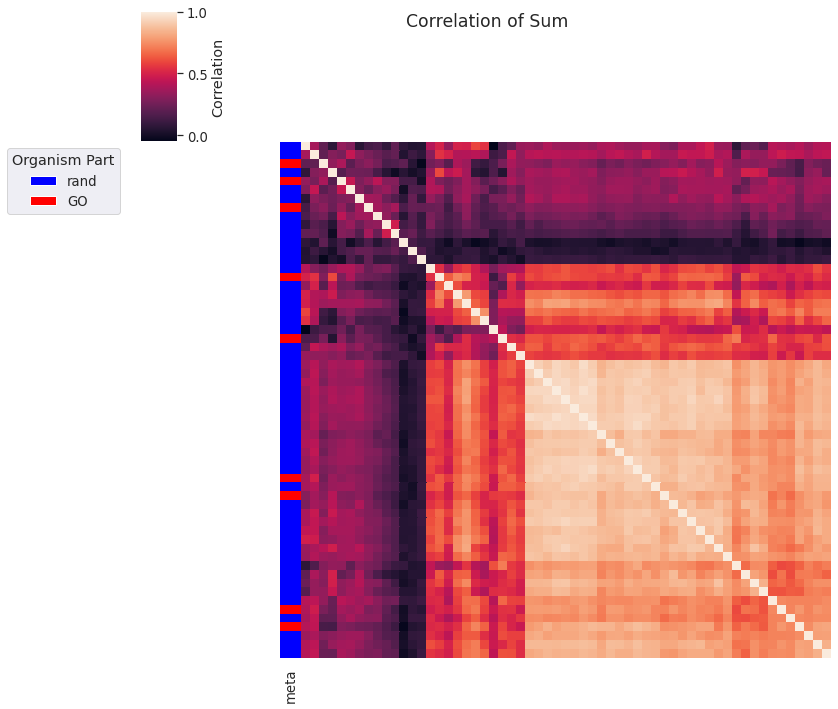

In [27]:
from matplotlib.patches import Patch

# Create the first cluster map
fig1 = sns.clustermap(plot_GO1_bulk.corr(), row_colors=row_colors_bulk, 
                      method="ward", metric="euclidean", cbar_pos=None, xticklabels=False,
                      yticklabels=False, dendrogram_ratio=0.2)
# Set the title of the first plot
fig1.fig.suptitle("Correlation of Bulk")

# Remove the dendrograms from the first plot
fig1.ax_row_dendrogram.set_visible(False)
fig1.ax_col_dendrogram.set_visible(False)

# Create the second cluster map
fig2 = sns.clustermap(plot_GO1_sum.corr(), row_colors=row_colors_sum,  
                      method="ward", metric="euclidean", cbar_kws={'label': 'Correlation'}, 
                      xticklabels=False, yticklabels=False, dendrogram_ratio=0.2)
# Set the title of the second plot
fig2.fig.suptitle("Correlation of Sum")

# Remove the dendrograms from the second plot
fig2.ax_row_dendrogram.set_visible(False)
fig2.ax_col_dendrogram.set_visible(False)

# Add a legend
handles = [Patch(facecolor=my_palette[key]) for key in my_palette]
plt.legend(handles, my_palette, title='Organism Part',
           bbox_to_anchor=(0, 0.8), bbox_transform=plt.gcf().transFigure, loc='upper right')

# Display the figure
plt.show()